# 1. Import Packages and Define Functions

In [1]:
# Import some libraries that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('viridis')
import mysql.connector
import sys
sys.path.insert(1, '/Users/brianmccabe/DataScience/Flatiron/mod5/Emoji_Analysis/Scripts/')
import config
import warnings
warnings.filterwarnings('ignore')



pd.set_option('display.max_columns', 300)

%matplotlib inline

In [2]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
import string
import scipy
import emoji
import re
from textblob import TextBlob
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import PassiveAggressiveClassifier
import xgboost
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
seed=42
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('brown')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brianmccabe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/brianmccabe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/brianmccabe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     /Users/brianmccabe/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [3]:
from tqdm import tqdm
tqdm.pandas()

In [4]:
# we can define a function that removes stopwords 
def process_tweet(tweet):
    tweet = str(tweet).lower()
    tokens = nltk.word_tokenize(tweet)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords]
    return stopwords_removed

In [5]:
#set stopwords and punctuations
stopwords = stopwords.words('english')
stopwords += list(string.punctuation)
stopwords += ["n't", "' '", "'re'","”","``","“","''","’","'s","'re","http","https", "rt"]
alph = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
stopwords += alph

In [6]:
stopwords = list(set(stopwords))

In [7]:
def remove_http(tweet):
    pattern = '((http|https)\w+\s\w+\s\w+\s\w+)'
    try:
        return tweet.replace(re.findall(pattern, tweet)[0][0], "")
    except:
        return tweet

In [8]:
def capital_percentage(tweet):
    tokens = nltk.word_tokenize(tweet)
    cap_count = 0
    for item in tokens:
        if item.isupper():
            cap_count += 1
    return cap_count/len(tokens)

In [9]:
def check_profanity(tweet):
    profane = pd.read_csv("profane_words.csv", header=None)

    profane = list(profane.loc[:,0])
    count = 0
    tweet = tweet.lower()
    tokens = nltk.word_tokenize(tweet)
    for word in tokens:
        if word in profane:
            count += 1
    return count/len(tweet)

In [10]:
def capital_percentage(tweet):
    tokens = nltk.word_tokenize(tweet)
    cap_count = 0
    for item in tokens:
        if item.isupper():
            cap_count += 1
    return cap_count/len(tokens)

In [11]:
def fix_spelling(tweet):
    b = TextBlob(tweet)
    return b.correct()

In [12]:
def get_subjectivity(tweet):
    b = TextBlob(tweet)
    return b.sentiment.subjectivity

In [13]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
  
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [14]:
def remove_username(tweet):
    try:
        p = '[\w\s]+(@\w+)'
        return tweet.replace(re.findall(p, tweet)[0], "")
    except:
        return tweet

In [15]:
def ReplaceThreeOrMore(tweet):
    # pattern to look for three or more repetitions of any character, including
    # newlines.
    pattern = re.compile(r"(.)\1{2,}", re.DOTALL) 
    return pattern.sub(r"\1\1", tweet)

In [16]:
def clean_txt(tweet):
    tweet = remove_http(tweet)
    tweet = remove_username(tweet)
    tweet = ReplaceThreeOrMore(tweet)
    tokens = process_tweet(tweet)
    return ' '.join([lemmatizer.lemmatize(w) for w in tokens])
    

In [17]:
def clean_txt_2(tweet):
    tweet = remove_http(tweet)
    tweet = remove_username(tweet)
    tweet = ReplaceThreeOrMore(tweet)
    return tweet.lower()

In [18]:
analyzer = SentimentIntensityAnalyzer()
def return_sentiment(tweet):
    return analyzer.polarity_scores(tweet)['compound']

# 2. Load in Data and Preprocess

In [19]:
df = pd.read_csv("tweets_4_classes.csv").drop(['Unnamed: 0', 'emoji_frequency'], axis=1)
df.head()

,tweet,sentiment_score,exclamation_points,top_emoji
0,i dont want to vote for pedophile biden im sor...,-0.7447,0.000000,😩
1,you need a President too I can be one for you ...,0.4033,0.000000,😊
2,Dì cheer! Cheeeeeeeeeeeeer! salvinisciacallo C...,0.9690,0.014286,😊
3,I ll kidnap 1000 children before I let this co...,-0.2942,0.010101,😊
4,omg there s more on the ballot then just the p...,-0.7003,0.000000,😱


In [20]:
print(df.tweet.iloc[0])
print(clean_txt(df.tweet.iloc[0]))
print(type(clean_txt(df.tweet.iloc[0])))

i dont want to vote for pedophile biden im sorry what
dont want vote pedophile biden im sorry
<class 'str'>


In [21]:
# # Remove "http link stuff from all the tweets"
# print(df.tweet.iloc[0])
# print(remove_http(df.tweet.iloc[0]))

# df.tweet = df.tweet.apply(remove_http)

In [22]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
normalizer = MinMaxScaler()
df.sentiment_score = normalizer.fit_transform(np.array(df.sentiment_score).reshape(-1,1))
df.sentiment_score.describe()

count    5019.000000
mean        0.602604
std         0.306544
min         0.000000
25%         0.307935
50%         0.701232
75%         0.872458
max         1.000000
Name: sentiment_score, dtype: float64

In [241]:
import pickle
pickle_out = open("normalizer.pickle","wb") ## pickling this for use in testing .py file
pickle.dump(normalizer, pickle_out)
pickle_out.close()

In [23]:
df['capitalization'] = df.tweet.progress_apply(capital_percentage)
df.head()

100%|██████████| 5019/5019 [00:00<00:00, 7962.43it/s]


,tweet,sentiment_score,exclamation_points,top_emoji,capitalization
0,i dont want to vote for pedophile biden im sor...,0.126140,0.000000,😩,0.000000
1,you need a President too I can be one for you ...,0.701232,0.000000,😊,0.066667
2,Dì cheer! Cheeeeeeeeeeeeer! salvinisciacallo C...,0.984621,0.014286,😊,0.000000
3,I ll kidnap 1000 children before I let this co...,0.351818,0.010101,😊,0.111111
4,omg there s more on the ballot then just the p...,0.148382,0.000000,😱,0.000000


In [24]:
df['profanity'] = df.tweet.progress_apply(check_profanity)
df.head()

100%|██████████| 5019/5019 [00:09<00:00, 522.93it/s]


,tweet,sentiment_score,exclamation_points,top_emoji,capitalization,profanity
0,i dont want to vote for pedophile biden im sor...,0.126140,0.000000,😩,0.000000,0.000000
1,you need a President too I can be one for you ...,0.701232,0.000000,😊,0.066667,0.000000
2,Dì cheer! Cheeeeeeeeeeeeer! salvinisciacallo C...,0.984621,0.014286,😊,0.000000,0.000000
3,I ll kidnap 1000 children before I let this co...,0.351818,0.010101,😊,0.111111,0.010753
4,omg there s more on the ballot then just the p...,0.148382,0.000000,😱,0.000000,0.000000


In [25]:
df['subjectivity'] = df.tweet.progress_apply(get_subjectivity)

100%|██████████| 5019/5019 [00:00<00:00, 5427.66it/s]


In [26]:
# test the replacing of extra chars
test = "yoooooo let's!! gooooo to the zoooo!. Wazzzzuppppp!!!. AAABBBCCC"

In [27]:
ReplaceThreeOrMore(test)

"yoo let's!! goo to the zoo!. Wazzupp!!. AABBCC"

In [28]:
df.top_emoji.value_counts()

😊    2922
😩    1061
😡     711
😱     325
Name: top_emoji, dtype: int64

Here we see a very clear and large class imbalance. In this notebook, all models try to handle this inbalance by balancing the weights given to each class.

Text(0, 0.5, 'Count')

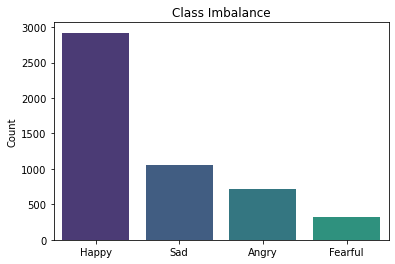

In [29]:
x_ax = ['Happy', 'Sad', 'Angry', 'Fearful']
y = df.top_emoji.value_counts()
sns.barplot(x_ax, y)
plt.title("Class Imbalance")
plt.ylabel("Count")
#plt.savefig("../pics/class_imbalance.png")

# 3. Dummy Classifier for Baseline Model

In [30]:
X = df[['tweet', 'sentiment_score', 'capitalization', 'profanity','exclamation_points']]

In [31]:
y =df['top_emoji']

In [32]:
from sklearn.dummy import DummyClassifier

In [33]:
dummy_cf = DummyClassifier(strategy='uniform')
dummy_cf.fit(X['tweet'],y)
y_preds = dummy_cf.predict(X['tweet'])

print(dummy_cf.score(X['tweet'],y))

0.2518429966128711


In [34]:
accuracy = accuracy_score(y, y_preds)


In [35]:
results=[]
results.append(('Dummy', accuracy))

In [36]:
results

[('Dummy', 0.2502490535963339)]

In [37]:
df.top_emoji.value_counts()

😊    2922
😩    1061
😡     711
😱     325
Name: top_emoji, dtype: int64

### This notebook uses class_weight = balanced, see other notebook for resampled results

In [38]:
# from sklearn.utils import resample
# cry = df[df.top_emoji == '😩']
# happy = df[df.top_emoji == '😊']
# fear = df[df.top_emoji == '😱']
# anger = df[df.top_emoji == '😡']


# cry_downsampled = resample(cry,
#                           replace=False,
#                           n_samples=int(len(fear)*1.5), # match number
#                           random_state=seed) 

# happy_downsampled = resample(happy,
#                           replace=False,
#                           n_samples=int(len(fear)*1.5), # match number 
#                           random_state=seed) 
# fear_upsampled = resample(fear,
#                           replace=True, 
#                           n_samples=int(len(fear)*1.5), # match number 
#                           random_state=seed) 
# anger_upsampled = resample(anger,
#                           replace=True,
#                           n_samples=int(len(fear)*1.5), # match number 
#                           random_state=seed) 

# df = pd.concat([cry_downsampled, happy_downsampled, fear_upsampled, anger_upsampled])
# df.top_emoji.value_counts()

In [39]:
X = df[['tweet', 'sentiment_score', 'capitalization', 'profanity','exclamation_points']]

In [40]:
y =df['top_emoji']

# 4. Supervised Learning

In [41]:
import en_core_web_sm
nlp = en_core_web_sm.load()
import spacy 
from sklearn.base import BaseEstimator, TransformerMixin
class SpacyVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, nlp):
        self.nlp = nlp
        self.dim = 300

    def fit(self, X, y):
        return self

    def transform(self, X):
        # Doc.vector defaults to an average of the token vectors.
        # https://spacy.io/api/doc#vector
        
        return [self.nlp(text).vector for text in X]

In [42]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.feature_extraction import DictVectorizer
class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]


class TextStats(BaseEstimator, TransformerMixin):
    """Extract features from each document for DictVectorizer"""

    def fit(self, x, y=None):
        return self

    def transform(self, data):
        rs = []
        for row in data.iterrows():
            to_add = {}
            for item in row[1:]:
                for ind, val in zip(item.index, item.values):
                    to_add[ind] = val
            rs.append(to_add)
        return rs
#         return [{'cap':  row['capitalization'], 'prof': row['profanity'], 
#                  'sent': row['sentiment_score'], 'excla': row['exclamation_points']} for _, row in data.iterrows()]

In [43]:
test = ItemSelector(['capitalization','sentiment_score','exclamation_points']).fit(X)

In [44]:
rs = []
for row in test.transform(X).iterrows():
    to_add = {}
    for item in row[1:]:
        for ind, val in zip(item.index, item.values):
            to_add[ind] = val
    rs.append(to_add)


In [45]:
rs[:2]

[{'capitalization': 0.0,
  'sentiment_score': 0.12613966536419197,
  'exclamation_points': 0.0},
 {'capitalization': 0.06666666666666667,
  'sentiment_score': 0.7012323414487527,
  'exclamation_points': 0.0}]

### Pipeline to help in the creation of our training arrays to include custom features as well as TF IDF and Word Embeddings.

- NOTE: Word embeddings hurt the score, hence it is commented out.

In [46]:
def create_pipeline(input_selectors): 
    pipeline = Pipeline([
        ('union', FeatureUnion(
            transformer_list=[

                # Pipeline for pulling features from the text
                ('text', Pipeline([
                    ('selector', ItemSelector(key='tweet')),
                    ('tfidf', TfidfVectorizer( min_df =3, max_df=0.2, max_features=None, 
                        strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
                        ngram_range=(1, 2), use_idf=1,smooth_idf=1,sublinear_tf=1,
                        stop_words = None, preprocessor=clean_txt)),
                ])),
                # Text two does not remove stopwords and tries to find bi and trigrams
                ('text_2', Pipeline([
                    ('selector', ItemSelector(key='tweet')),
                    ('tfidf', TfidfVectorizer( min_df =3, max_df=0.2, max_features=None, 
                        strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
                        ngram_range=(2, 10), use_idf=1,smooth_idf=1,sublinear_tf=1,
                        stop_words = None, preprocessor=clean_txt_2)),
                ])),

    #             ('embedding', Pipeline([
    #                 ('selector', ItemSelector(key='tweet')),
    #                 ("mean_embeddings", SpacyVectorTransformer(nlp))
    #             ])),

                # Pipeline for pulling metadata features
                ('stats', Pipeline([
                    ('selector', ItemSelector(key=input_selectors)),
                    ('stats', TextStats()),  # returns a list of dicts
                    ('vect', DictVectorizer()),  # list of dicts -> feature matrix
                ])),

            ],

            # weight components in FeatureUnion
            transformer_weights={
                'text': 1,#0.9,
                'text_2':1,
    #             'embedding': 1,
                'stats': 1 #1.5,
            },
        ))
    ], verbose=True)
    
    return pipeline

['capitalization','profanity','sentiment_score','exclamation_points']

In [47]:
pipeline_cap = create_pipeline(['capitalization'])
pipeline_prof = create_pipeline(['profanity'])
pipeline_sent = create_pipeline(['sentiment_score'])
pipeline_excl = create_pipeline(['exclamation_points'])
pipeline_all = create_pipeline(['capitalization','profanity','sentiment_score','exclamation_points'])

In [48]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

In [49]:
pipeline_cap.fit(X_train)
pipeline_prof.fit(X_train)
pipeline_sent.fit(X_train)
pipeline_excl.fit(X_train)
pipeline_all.fit(X_train)

[Pipeline] ............. (step 1 of 1) Processing union, total=   2.1s
[Pipeline] ............. (step 1 of 1) Processing union, total=   2.0s
[Pipeline] ............. (step 1 of 1) Processing union, total=   2.0s
[Pipeline] ............. (step 1 of 1) Processing union, total=   2.0s
[Pipeline] ............. (step 1 of 1) Processing union, total=   2.0s


Pipeline(steps=[('union',
                 FeatureUnion(transformer_list=[('text',
                                                 Pipeline(steps=[('selector',
                                                                  ItemSelector(key='tweet')),
                                                                 ('tfidf',
                                                                  TfidfVectorizer(max_df=0.2,
                                                                                  min_df=3,
                                                                                  ngram_range=(1,
                                                                                               2),
                                                                                  preprocessor=<function clean_txt at 0x1259160d0>,
                                                                                  smooth_idf=1,
                                                           

In [240]:
pickle_out = open("pipeline_all.pickle","wb") ## pickling this for use in testing .py file
pickle.dump(pipeline_all, pickle_out)
pickle_out.close()

In [50]:
%%time
train_vec_cap = pipeline_cap.transform(X_train)
test_vec_cap = pipeline_cap.transform(X_test)
print("Checking that the shapes match: %s - %s" % (train_vec_cap.shape, test_vec_cap.shape))

train_vec_prof = pipeline_prof.transform(X_train)
test_vec_prof = pipeline_prof.transform(X_test)
print("Checking that the shapes match: %s - %s" % (train_vec_prof.shape, test_vec_prof.shape))

train_vec_sent = pipeline_sent.transform(X_train)
test_vec_sent = pipeline_sent.transform(X_test)
print("Checking that the shapes match: %s - %s" % (train_vec_sent.shape, test_vec_sent.shape))

train_vec_excl = pipeline_excl.transform(X_train)
test_vec_excl = pipeline_excl.transform(X_test)
print("Checking that the shapes match: %s - %s" % (train_vec_excl.shape, test_vec_excl.shape))

train_vec_all = pipeline_all.transform(X_train)
test_vec_all = pipeline_all.transform(X_test)
print("Checking that the shapes match: %s - %s" % (train_vec_all.shape, test_vec_all.shape))

Checking that the shapes match: (4015, 8972) - (1004, 8972)
Checking that the shapes match: (4015, 8972) - (1004, 8972)
Checking that the shapes match: (4015, 8972) - (1004, 8972)
Checking that the shapes match: (4015, 8972) - (1004, 8972)
Checking that the shapes match: (4015, 8975) - (1004, 8975)
CPU times: user 10.8 s, sys: 20.7 ms, total: 10.8 s
Wall time: 10.8 s


In [51]:
trains = [train_vec_cap, train_vec_prof, train_vec_sent, train_vec_excl, train_vec_all]
tests = [test_vec_cap, test_vec_prof, test_vec_sent, test_vec_excl, test_vec_all]
labels = ['capitalization', 'profanity', 'sentiment_score', 'exclamation_points', 'all_custom']

## Create Overarching Function for Iterative Modeling
- Takes in a model
- Runs that model against all the different train/test vecs with dif features
- prints out accuracy and description of what train/test vec worked best
- prints out confusion matrix and classification report for best version of the model
- Returns best score 

In [52]:
def get_model_results(model, model_name, conditions=None, choices=None):
    res = []
    for train, test, label in zip(trains, tests, labels):
        if type(model) == xgboost.sklearn.XGBClassifier:
            model.fit(train, y_train, eval_metric='mlogloss', sample_weight = np.select(conditions, choices, None))
        else:
            model.fit(train, y_train)
        test_preds = model.predict(test)
        accuracy = accuracy_score(y_test, test_preds)
        res.append({'label': label, 'score': accuracy, 'test_preds': test_preds})
    res = sorted(res, key = lambda x: x['score'], reverse=True)
    print('RESULTS')
    print('-------------------------------------------------------------------------------------------------')
    print(f"{model_name} with {res[0]['label']} features performed the best with an accuracy of {res[0]['score']}")
    print('-------------------------------------------------------------------------------------------------')
    print(classification_report(y_test, res[0]['test_preds']))
    print('----------------------------------------')
    print(confusion_matrix(y_test, res[0]['test_preds']))
    return res[0]['score']

### LogReg

Algorithm to use in the optimization problem.

    - For small datasets, 'liblinear' is a good choice, whereas 'sag' and
      'saga' are faster for large ones.
    - For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs'
      handle multinomial loss; 'liblinear' is limited to one-versus-rest
      schemes.
    - 'newton-cg', 'lbfgs' and 'sag' only handle L2 penalty, whereas
      'liblinear' and 'saga' handle L1 penalty.
    - 'liblinear' might be slower in LogisticRegressionCV because it does
      not handle warm-starting.


In [53]:
lr_clf = LogisticRegressionCV(solver='newton-cg', cv=10, penalty='l2', Cs = [.001,.01,.1,1,10,100], 
                                    max_iter=10000, verbose=True, n_jobs=-1, scoring='f1', multi_class='ovr',
                                class_weight='balanced')
results.append(('log reg', get_model_results(lr_clf, 'log reg')))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.8s finished


RESULTS
-------------------------------------------------------------------------------------------------
log reg with sentiment_score features performed the best with an accuracy of 0.75
-------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           😊       0.89      0.93      0.91       585
           😡       0.49      0.45      0.47       142
           😩       0.64      0.61      0.62       212
           😱       0.30      0.28      0.29        65

    accuracy                           0.75      1004
   macro avg       0.58      0.57      0.57      1004
weighted avg       0.74      0.75      0.74      1004

----------------------------------------
[[542  24  14   5]
 [ 32  64  33  13]
 [ 33  26 129  24]
 [  4  16  27  18]]


In [54]:
results

[('Dummy', 0.2502490535963339), ('log reg', 0.75)]

### SVM(s)

#### LinearSVC

In [55]:
sv_clf = LinearSVC(C=1, class_weight='balanced', multi_class='ovr', random_state=seed) 
results.append(('linear svc', get_model_results(sv_clf, 'linear svc')))

RESULTS
-------------------------------------------------------------------------------------------------
linear svc with all_custom features performed the best with an accuracy of 0.7559760956175299
-------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           😊       0.87      0.94      0.91       585
           😡       0.52      0.44      0.48       142
           😩       0.64      0.62      0.63       212
           😱       0.31      0.22      0.25        65

    accuracy                           0.76      1004
   macro avg       0.58      0.55      0.57      1004
weighted avg       0.74      0.76      0.74      1004

----------------------------------------
[[551  17  14   3]
 [ 37  63  35   7]
 [ 37  23 131  21]
 [  6  19  26  14]]


In [56]:
results

[('Dummy', 0.2502490535963339),
 ('log reg', 0.75),
 ('linear svc', 0.7559760956175299)]

#### SVC

In [57]:
svc = SVC(C=15, class_weight='balanced', kernel='rbf', gamma='scale')
results.append(('svc', get_model_results(svc, 'svc')))

RESULTS
-------------------------------------------------------------------------------------------------
svc with all_custom features performed the best with an accuracy of 0.7828685258964143
-------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           😊       0.88      0.96      0.92       585
           😡       0.64      0.38      0.48       142
           😩       0.62      0.75      0.68       212
           😱       0.52      0.22      0.30        65

    accuracy                           0.78      1004
   macro avg       0.66      0.57      0.59      1004
weighted avg       0.77      0.78      0.76      1004

----------------------------------------
[[560   9  16   0]
 [ 36  54  45   7]
 [ 34  14 158   6]
 [  7   8  36  14]]


In [58]:
results

[('Dummy', 0.2502490535963339),
 ('log reg', 0.75),
 ('linear svc', 0.7559760956175299),
 ('svc', 0.7828685258964143)]

### Random Forest

In [59]:
rfc_clf = RandomForestClassifier(n_estimators=400, random_state=seed,n_jobs=-1,
                                 class_weight='balanced',criterion='entropy' )
results.append(('rfc', get_model_results(rfc_clf, 'rfc')))


RESULTS
-------------------------------------------------------------------------------------------------
rfc with all_custom features performed the best with an accuracy of 0.7739043824701195
-------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           😊       0.85      0.95      0.90       585
           😡       0.60      0.45      0.51       142
           😩       0.63      0.70      0.66       212
           😱       0.88      0.11      0.19        65

    accuracy                           0.77      1004
   macro avg       0.74      0.55      0.57      1004
weighted avg       0.77      0.77      0.75      1004

----------------------------------------
[[558  10  17   0]
 [ 42  64  36   0]
 [ 45  18 148   1]
 [ 10  15  33   7]]


In [60]:
results

[('Dummy', 0.2502490535963339),
 ('log reg', 0.75),
 ('linear svc', 0.7559760956175299),
 ('svc', 0.7828685258964143),
 ('rfc', 0.7739043824701195)]

### MN Bayes

In [61]:
#Multinomial Naive Bayes
mnb_clf = MultinomialNB() 
results.append(('mn bayes', get_model_results(mnb_clf, 'mn bayes')))

RESULTS
-------------------------------------------------------------------------------------------------
mn bayes with sentiment_score features performed the best with an accuracy of 0.6543824701195219
-------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           😊       0.65      0.98      0.78       585
           😡       0.81      0.20      0.33       142
           😩       0.63      0.23      0.33       212
           😱       1.00      0.06      0.12        65

    accuracy                           0.65      1004
   macro avg       0.77      0.37      0.39      1004
weighted avg       0.69      0.65      0.58      1004

----------------------------------------
[[576   1   8   0]
 [104  29   9   0]
 [161   3  48   0]
 [ 47   3  11   4]]


In [62]:
results

[('Dummy', 0.2502490535963339),
 ('log reg', 0.75),
 ('linear svc', 0.7559760956175299),
 ('svc', 0.7828685258964143),
 ('rfc', 0.7739043824701195),
 ('mn bayes', 0.6543824701195219)]

### Bernoulli Bayes

In [63]:
#Bernoulli Naive Bayes
bb_clf = BernoulliNB() 
results.append(('bernoulli bayes', get_model_results(bb_clf, 'bernoulli bayes')))

RESULTS
-------------------------------------------------------------------------------------------------
bernoulli bayes with exclamation_points features performed the best with an accuracy of 0.6225099601593626
-------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           😊       0.66      0.88      0.75       585
           😡       0.69      0.17      0.27       142
           😩       0.46      0.39      0.42       212
           😱       0.50      0.06      0.11        65

    accuracy                           0.62      1004
   macro avg       0.58      0.37      0.39      1004
weighted avg       0.61      0.62      0.57      1004

----------------------------------------
[[515  10  56   4]
 [ 93  24  25   0]
 [130   0  82   0]
 [ 44   1  16   4]]


In [64]:
results

[('Dummy', 0.2502490535963339),
 ('log reg', 0.75),
 ('linear svc', 0.7559760956175299),
 ('svc', 0.7828685258964143),
 ('rfc', 0.7739043824701195),
 ('mn bayes', 0.6543824701195219),
 ('bernoulli bayes', 0.6225099601593626)]

### Passive Aggressive Classifier

In [65]:
#PassiveAggresive Classifier
pac_clf = PassiveAggressiveClassifier() 
results.append(('pac', get_model_results(pac_clf, 'pac')))

RESULTS
-------------------------------------------------------------------------------------------------
pac with all_custom features performed the best with an accuracy of 0.7360557768924303
-------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           😊       0.85      0.94      0.89       585
           😡       0.48      0.44      0.46       142
           😩       0.62      0.54      0.58       212
           😱       0.30      0.20      0.24        65

    accuracy                           0.74      1004
   macro avg       0.56      0.53      0.54      1004
weighted avg       0.71      0.74      0.72      1004

----------------------------------------
[[548  19  14   4]
 [ 43  63  31   5]
 [ 48  28 115  21]
 [  7  21  24  13]]


In [66]:
results

[('Dummy', 0.2502490535963339),
 ('log reg', 0.75),
 ('linear svc', 0.7559760956175299),
 ('svc', 0.7828685258964143),
 ('rfc', 0.7739043824701195),
 ('mn bayes', 0.6543824701195219),
 ('bernoulli bayes', 0.6225099601593626),
 ('pac', 0.7360557768924303)]

### XGBoost

In [67]:
conditions = [
   y_train=='😊', y_train=='😩',y_train== '😡',y_train=='😱'
]

choices = 1 / np.array(list(y_train.value_counts(normalize=True))) # Assign weights to each class
choices

array([ 1.71801455,  4.72909305,  7.05623902, 15.44230769])

In [68]:
xg = xgb.XGBClassifier(n_jobs=-1)
results.append(('xgboost', get_model_results(xg, 'xgboost', conditions, choices)))

RESULTS
-------------------------------------------------------------------------------------------------
xgboost with all_custom features performed the best with an accuracy of 0.7848605577689243
-------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           😊       0.92      0.92      0.92       585
           😡       0.56      0.51      0.53       142
           😩       0.65      0.71      0.68       212
           😱       0.48      0.45      0.46        65

    accuracy                           0.78      1004
   macro avg       0.65      0.65      0.65      1004
weighted avg       0.78      0.78      0.78      1004

----------------------------------------
[[536  25  22   2]
 [ 21  72  37  12]
 [ 19  24 151  18]
 [  5   7  24  29]]


In [69]:
results

[('Dummy', 0.2502490535963339),
 ('log reg', 0.75),
 ('linear svc', 0.7559760956175299),
 ('svc', 0.7828685258964143),
 ('rfc', 0.7739043824701195),
 ('mn bayes', 0.6543824701195219),
 ('bernoulli bayes', 0.6225099601593626),
 ('pac', 0.7360557768924303),
 ('xgboost', 0.7848605577689243)]

### Voting Classifier

In [70]:
voting_clf = VotingClassifier(
                estimators=[('logreg', lr_clf), ('svm_linear', sv_clf), ('pass_aggr', pac_clf),
                            ('svc', svc), ('xgboost', xg), ('rfc', rfc_clf),
                            ('mnbayes', mnb_clf),('berbayes', bb_clf)], #(
                voting='hard', verbose=1, n_jobs= -1)
results.append(('voting', get_model_results(voting_clf, 'voting')))

RESULTS
-------------------------------------------------------------------------------------------------
voting with all_custom features performed the best with an accuracy of 0.7689243027888446
-------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           😊       0.84      0.96      0.90       585
           😡       0.60      0.43      0.50       142
           😩       0.66      0.65      0.65       212
           😱       0.46      0.17      0.25        65

    accuracy                           0.77      1004
   macro avg       0.64      0.55      0.57      1004
weighted avg       0.74      0.77      0.75      1004

----------------------------------------
[[563  10  11   1]
 [ 45  61  33   3]
 [ 51  15 137   9]
 [ 11  15  28  11]]


In [71]:
results = sorted(results, key=lambda x: x[1], reverse=True)
results

[('xgboost', 0.7848605577689243),
 ('svc', 0.7828685258964143),
 ('rfc', 0.7739043824701195),
 ('voting', 0.7689243027888446),
 ('linear svc', 0.7559760956175299),
 ('log reg', 0.75),
 ('pac', 0.7360557768924303),
 ('mn bayes', 0.6543824701195219),
 ('bernoulli bayes', 0.6225099601593626),
 ('Dummy', 0.2502490535963339)]

### Bar Chart of Different Model Results

In [72]:
x = [x[0] for x in results]
y = [x[1] for x in results]

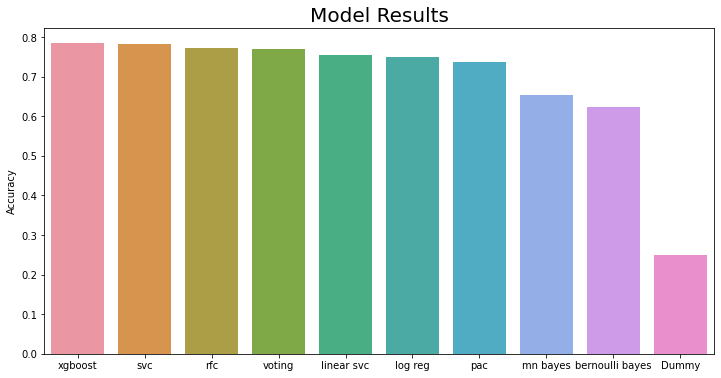

In [73]:
plt.figure(figsize=(12,6))
sns.barplot(x,y)
plt.ylabel('Accuracy')
plt.title("Model Results", fontsize=20)
plt.savefig("../pics/model_performances.png")  ## NOTE THIS WILL BE OVERWRITTEN BELOW WITH A BETTER XGBOOST

## Gridsearch to try and improve xgboost

In [154]:
params = {
        'min_child_weight': [1],
        'gamma': [.03,.05, .07],
        'subsample': [1.0],
        'colsample_bytree': [.8],
        'max_depth': [4,5,6]
        }

Writing these down, best score so far

{'colsample_bytree': 0.8,
 'gamma': 0.5,
 'max_depth': 5,
 'min_child_weight': 1,
 'subsample': 1.0}

In [155]:
grid = GridSearchCV(xgb.XGBClassifier(), params, cv = 5, n_jobs=-1, verbose=1)
grid.fit(train_vec_all, y_train, eval_metric='mlogloss')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   50.3s finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [156]:
grid.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.05,
 'max_depth': 5,
 'min_child_weight': 1,
 'subsample': 1.0}

In [157]:
grid.best_score_

0.7947696139476962

#### PICKLE MODEL

In [226]:
pickle_out = open("xgboost.pickle","wb")
pickle.dump(grid.best_estimator_, pickle_out)
pickle_out.close()

In [158]:
ps = grid.best_estimator_.predict(test_vec_all)

In [175]:
accuracy_score(y_test, ps)

0.7918326693227091

In [160]:
f1_score(y_test, ps, average='weighted') ## need weighted because multiclass with class imbalance

0.7810337323388371

In [161]:
confusion_matrix(y_test, ps)

array([[557,  12,  14,   2],
       [ 26,  63,  48,   5],
       [ 34,  16, 152,  10],
       [  6,   9,  27,  23]])

In [162]:
print(classification_report(y_test, ps))

              precision    recall  f1-score   support

           😊       0.89      0.95      0.92       585
           😡       0.63      0.44      0.52       142
           😩       0.63      0.72      0.67       212
           😱       0.57      0.35      0.44        65

    accuracy                           0.79      1004
   macro avg       0.68      0.62      0.64      1004
weighted avg       0.78      0.79      0.78      1004



Slightly better results with gridsearch, boosted accuracy by about a percent

In [177]:
results[0] = ('xgboost', accuracy_score(y_test, ps))

In [178]:
results

[('xgboost', 0.7918326693227091),
 ('svc', 0.7828685258964143),
 ('rfc', 0.7739043824701195),
 ('voting', 0.7689243027888446),
 ('linear svc', 0.7559760956175299),
 ('log reg', 0.75),
 ('pac', 0.7360557768924303),
 ('mn bayes', 0.6543824701195219),
 ('bernoulli bayes', 0.6225099601593626),
 ('Dummy', 0.2502490535963339)]

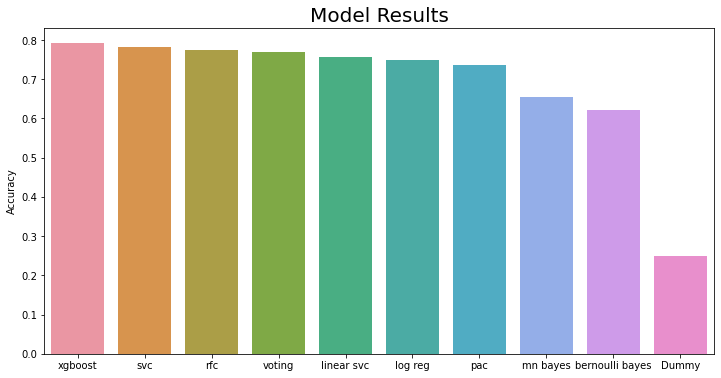

In [180]:
x = [x[0] for x in results]
y = [x[1] for x in results]
plt.figure(figsize=(12,6))
sns.barplot(x,y)
plt.ylabel('Accuracy')
plt.title("Model Results", fontsize=20)
plt.savefig("../pics/model_performances.png")

## Take a look at the wrong predictions

In [211]:
check_preds=pd.DataFrame()
check_preds = pd.concat([df.loc[y_test.index], y_test], axis=1)

In [212]:
check_preds['prediction'] = ps

In [222]:
check_preds = check_preds.loc[:,~check_preds.columns.duplicated()]

In [257]:
dfdf= df.loc[X_train.index]
for tweet in dfdf[dfdf.top_emoji == '😱'].tweet:
    print(tweet)

RT @grandmagrit Anyone have election anxiety Mine is going thru the roof
@realDonaldTrump My tweet is going wild right now! By the way I m a black french guy who loves America and presi https t co DczMJ89tuk
@realDonaldTrump OMG! ARREST JOE BIDEN for High TREASON! He s a Crook amp NOW has STOLE this Monkey ELECTION!!! https t co 4FHaY7OHTP
RT @disneywjoseph this election is so close https t co 4WUBZsCpVS
that s a lot of mf money y all president owes!!! https t co UHL4PdQKUl
RT @lilimagnifique Lisa bought a rose cup for rosé and the gold design is a REAL GOLD 블랙핑크 리사 I followed @965TDY and I vote LISA fo
RT @TinaDHopkins Biden has TAKEN THE LEAD in Georgia!! Holy shit Maybe it s not too late for that blue wave after all
OMG IM GETTING ELECTION ANXIETY Resisters let s have faith!!! Vote2020
RT @UnabashedMisfit @johnkruzel IT MAKES SENSE NOW Trump amp Rs downplay virus all yr so their voters won t be afraid to vote in person
Bitches worried about an election ELECT THESE NUTS NIGGA
@madsma

In [223]:
wrong_preds = check_preds[check_preds.top_emoji != check_preds.prediction]

#### Some notes on what I see in the list of missclassified tweets seen below:
- Some tweets are a couple words followed by a video, picture, link, etc. More likely than not, the emotion of the tweet is captured in the content of the media. My model will not be able to pick up on these emotions. In a perfect world, I would drop them and run everything again, however, I would be losing a lot of data (and some of these posts with links still have some text that carries emotion). If I had in the tens or hundreds of thousands of observations from each class, I would 100% drop these observations from my dataset!!
- The model has a hard time differentiating anger and fear. This makes sense since they are both negative emotions that might use a lot of the same buzz words. I believe, though, that the respective scores would greatly increase with more data. Remember, I only had 325 observations for fearful tweets. In NLP, to truly begin to learn a classification task, especially a multiclass one, more data would be needed.
- The model is trained on all ends of the political spectrum. What is happy for a right leaning individual is probably the opposite for a left leaning individual, and vice versa. This project could be supplemented by another machine learning project that works to classifiy political leanings on twitter. My past reddit NLP project might be a good starting ground for this!
- Lastly, I am trusting that the results from twitter will have the posters accurately use emojis, wherein reality, some people will use the 'objectively' wrong emoji for certain situations. If there were hundreds of thousands of observations, this issue would likely correct itself and converge, but with the low amount of data I have, it is more of a problem. For example this tweet: "I m sickkkkk of these bastards always mentioning Obama leave that fucking man alone! He hasn t been president for four damn years" -- I would strongly advocate that it should be labeled as "Angry", which my model predicted. However, it is actually a "Sad" class, at least based on the emoji that the author of the tweet chose to use.

In [224]:
for tweet, act, pred in zip(wrong_preds.tweet, wrong_preds.top_emoji, wrong_preds.prediction):
    print(tweet)
    print(f"Actual: {act}")
    print(f"Prediction: {pred}")
    print("---------------------------------------------------------------------------------------------------")

RT @yeajiprofile Yeyes! Please go to idol champ and vote for Yea Ji We are going down Every vote is counted please participate Let ju
Actual: 😩
Prediction: 😊
---------------------------------------------------------------------------------------------------
And u say u don t hate such a president for doing all this https t co HBns2DvAuf
Actual: 😡
Prediction: 😩
---------------------------------------------------------------------------------------------------
Yea I just remembered tomorrow is Election Day and my heart rate really just increased
Actual: 😩
Prediction: 😊
---------------------------------------------------------------------------------------------------
Me watching trump supporters https t co uXeLMJ8MTm
Actual: 😩
Prediction: 😊
---------------------------------------------------------------------------------------------------
JOE BIDEN WILL NEVER EVER EVER BE MY PRESIDENT THAT OLD MAN!!!! ElectionResults2020 JoeBiden
Actual: 😡
Prediction: 😱
----------------------------------